# Sampling Spatial Distributions
<a href="https://colab.research.google.com/github/ArtificialStellarPopulations/ArtPop/blob/main/docs/colab_notebooks/spatial.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" target="_blank"/>
</a>


To make an artificial image of a stellar system, you need the fluxes of the stars _and_ their spatial positions. In the [Building Stellar Populations](pops.ipynb) tutorial, we showed how to use **ArtPop** to generate stellar magnitudes. In this tutorial, we demonstrate how to sample spatial positions. At the moment [Plummer](../api/artpop.space.plummer_xy.rst), [Sersic](../api/artpop.space.sersic_xy.rst), and [uniform](../api/artpop.space.uniform_xy.rst) distributions are implemented in **ArtPop**.

First, we start with the imports we will need:

In [1]:
# Third-party imports
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

# Project import
import artpop

# artpop's matplotlib style
plt.style.use(artpop.mpl_style)

# use this random state for reproducibility
rng = np.random.RandomState(9)

## The Plummer Distribution

The Plummer distribution is sampled using [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling). To generate ``xy`` pixel positions that are distributed according to a Plummer distribution, use the [plummer_xy](../api/artpop.space.plummer_xy.rst) function:

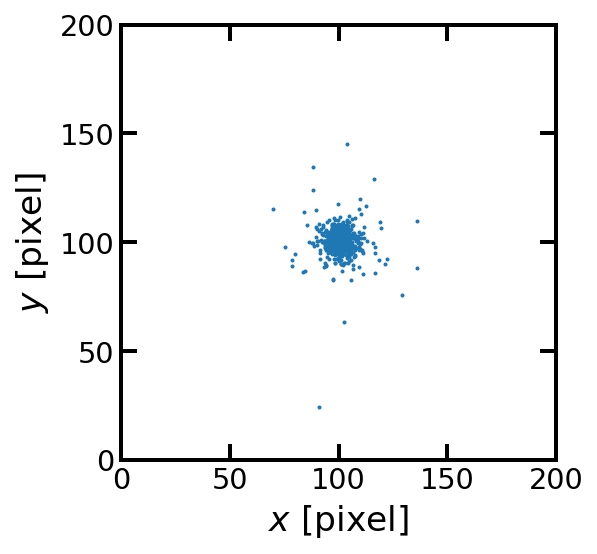

In [2]:
# keyword arguments for the plummer function
kws = dict(
    num_stars = 1e4,          # number of stars
    scale_radius = 50 * u.pc, # plummer scale radius
    distance = 55 * u.Mpc,    # distance to system
    xy_dim = (201, 201),      # xy dimensions of image
    pixel_scale = 0.2,        # pixel scale in pixel/arcsec
    random_state = rng        # random state for reproducibility
)

xy = artpop.plummer_xy(**kws)

plt.plot(xy[:, 0], xy[:, 1], 'o', ms=1)
plt.gca().set(xlim=(0, 200), ylim=(0, 200), aspect='equal', 
              xlabel='$x$ [pixel]', ylabel='$y$ [pixel]');

The sampled positions are returned as a [NumPy Masked Array](https://numpy.org/doc/stable/reference/maskedarray.baseclass.html#numpy.ma.MaskedArray), ``xy``, where positions that are outside the image, based on the ``xy_dim`` parameter, are masked.

If there are any stars outside the image, a warning will be printed. Let's move the system to a much closer distance so that we'll have some stars outside the image:

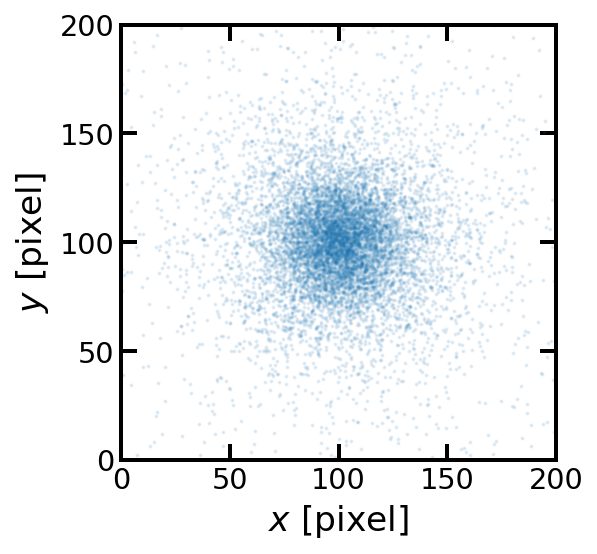

In [3]:
kws['distance'] = 2 * u.Mpc

xy = artpop.plummer_xy(**kws)

plt.plot(xy[:, 0], xy[:, 1], 'o', ms=1, alpha=0.1)
plt.gca().set(xlim=(0, 200), ylim=(0, 200), aspect='equal', 
              xlabel='$x$ [pixel]', ylabel='$y$ [pixel]');

## The Sersic Distribution

The Sersic distribution is sampled within a discrete grid using [NumPy's choice function](https://docs.scipy.org/doc//numpy-1.10.4/reference/generated/numpy.random.choice.html). The ``num_r_eff`` parameter is used to set the number of effective radii within the discrete grid. You want this number to be large enough so that you don't oversample small radii, but keep in mind that it is using a discrete grid, which requires more and more memory as ``num_r_eff`` increases.

The API for sampling ``xy`` pixel positions from a Sersic distribution is similar to the Plummer distribution:

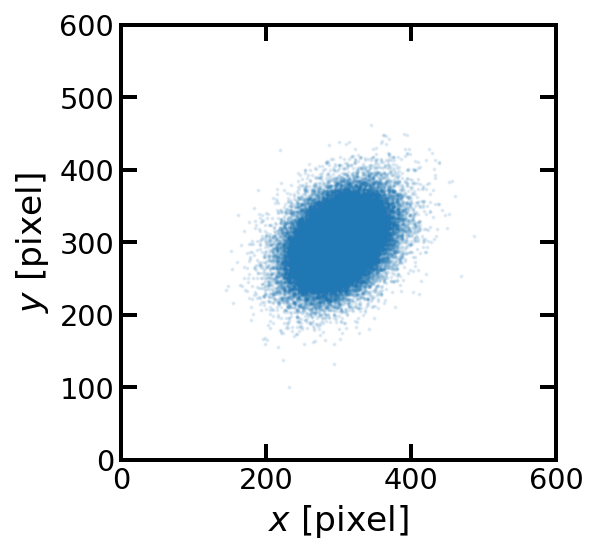

In [4]:
# note that all parameters with units can also be given 
# as floats, in which case a default unit (see doc string) 
# is assumed. e.g., r_eff will be assumed to be in kpc
xy = artpop.sersic_xy(
    num_stars = 1e5,     # the number of stars
    r_eff = 0.5,         # effective radius (kpc)
    n = 0.8,             # Sersic index
    theta = 45,          # position angle (deg)
    ellip = 0.3,         # ellipticity 
    distance = 15,       # distance to system (Mpc)
    xy_dim = 601,        # xy dimensions of image
    pixel_scale = 0.2,   # pixel scale in pixel/arcsec
    num_r_eff = 10,      # number of r_eff in discrete grid
    random_state = rng   # random state for reproducibility
)

plt.plot(xy[:, 0], xy[:, 1], 'o', ms=1, alpha=0.1)
plt.gca().set(xlim=(0, 600), ylim=(0, 600), aspect='equal', 
              xlabel='$x$ [pixel]', ylabel='$y$ [pixel]');

## Grid Sampling

As noted above, **ArtPop** samples from a Sersic distribution using a discrete grid. Grid sampling for arbitrary two-dimensional functions is accessible to the user through the [xy_from_grid](../api/artpop.space.xy_from_grid.rst) function. The input function is expected to be an [astropy model](https://docs.astropy.org/en/stable/modeling/predef_models2D.html). Here's an example using the [Ring2D](https://docs.astropy.org/en/stable/api/astropy.modeling.functional_models.Ring2D.html#astropy.modeling.functional_models.Ring2D) model:

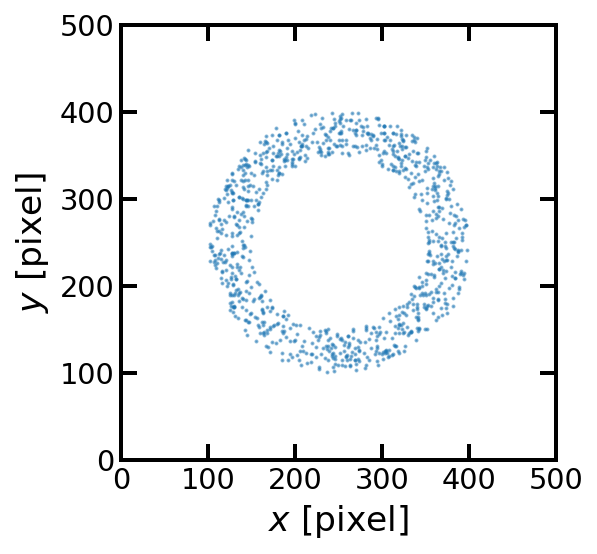

In [5]:
from astropy.modeling.models import Ring2D

# initialize an astropy 2D ring model
ring = Ring2D(x_0=250, y_0=250, r_in=100, width=50)

xy = artpop.xy_from_grid(
    num_stars = 1e3,
    model = ring,
    xy_dim = (501, 501),
    random_state = rng
)

plt.plot(xy[:, 0], xy[:, 1], 'o', ms=1, alpha=0.5)
plt.gca().set(xlim=(0, 500), ylim=(0, 500), aspect='equal', 
              xlabel='$x$ [pixel]', ylabel='$y$ [pixel]');